<a href="https://colab.research.google.com/github/AndreaDAlcantara/DS_Portfolio/blob/main/FF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Analysis using Web Scraping**

Web Scraping with BeautifulSoup4

In [1]:
!pip3 install beautifulsoup4
!pip3 install requests

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import sys

import requests
from bs4 import BeautifulSoup
import re
import unicodedata
import pandas as pd

For this project, I am going to access the Foo Fighters discography WikiPedia page and turn it into a clean dataset in order to show meaningful information about their albums.

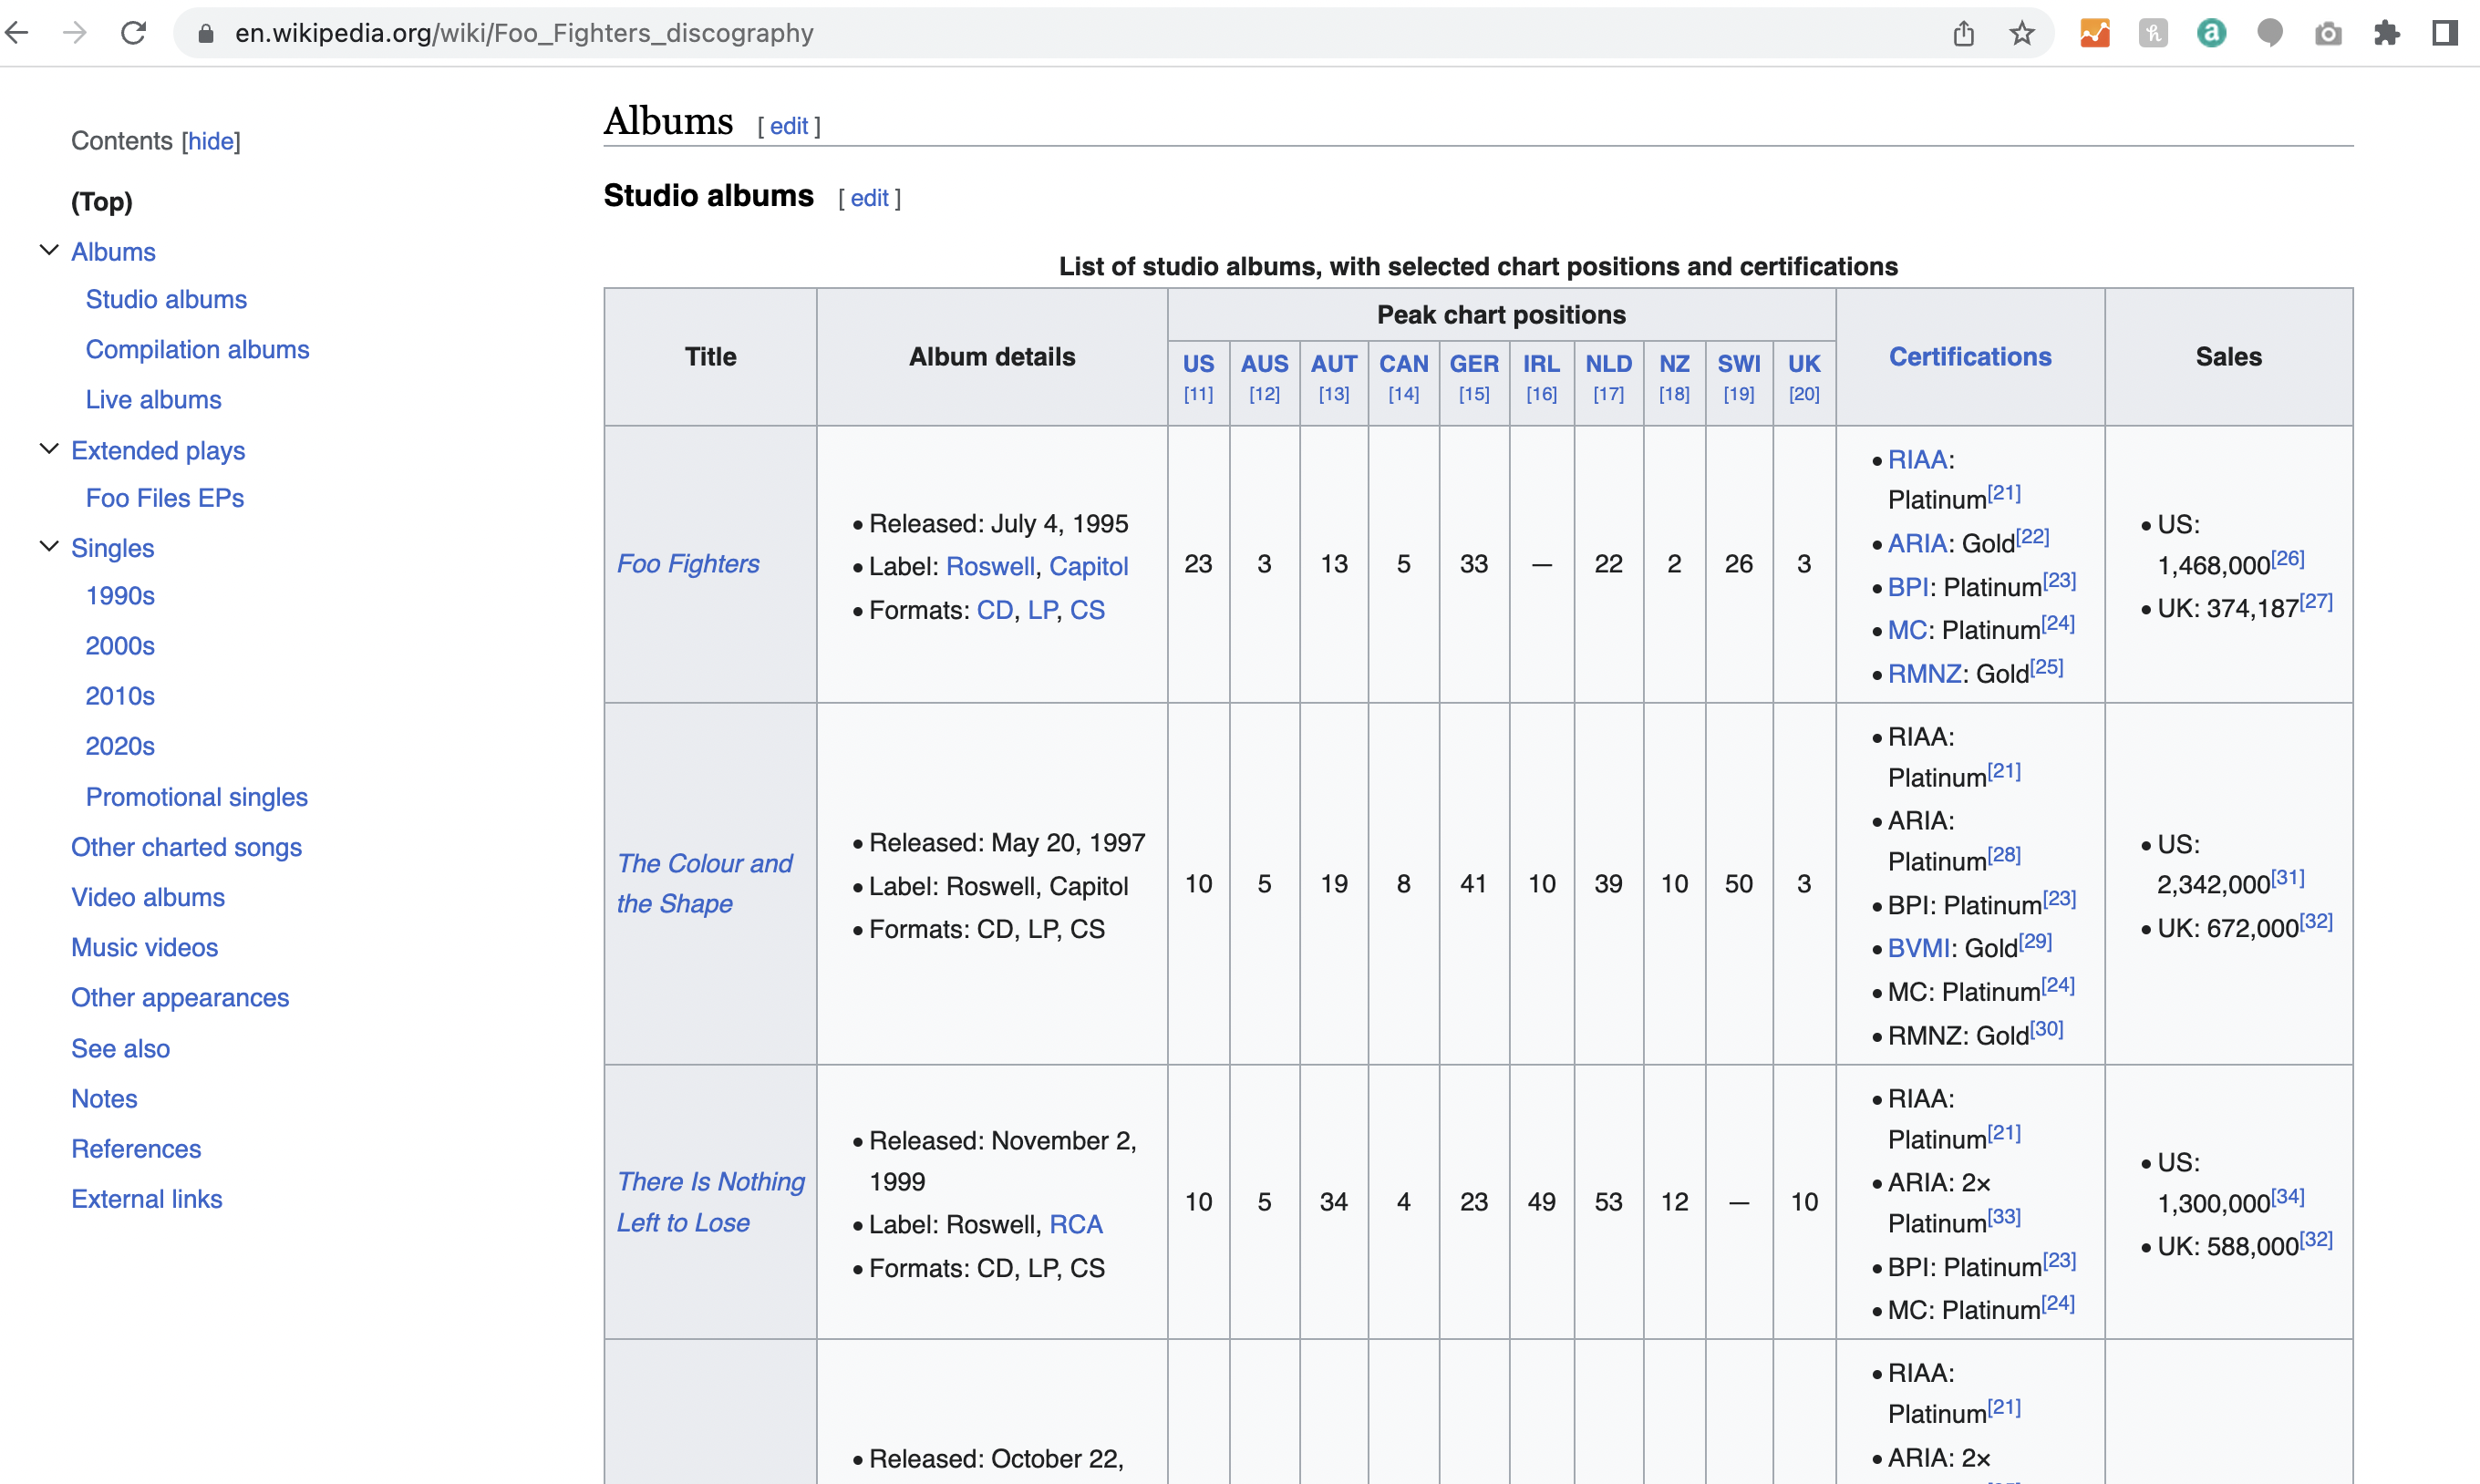

In [3]:
static_url = "https://en.wikipedia.org/wiki/Foo_Fighters_discography"

In [4]:
# use requests.get() method with the provided static_url
# assign the response to a object
data  = requests.get(static_url).text

In [5]:
# Use BeautifulSoup() to create a BeautifulSoup object from a response text content
soup = BeautifulSoup(data,"html.parser")

In [6]:
# Use soup.title attribute
print(soup.title)

<title>Foo Fighters discography - Wikipedia</title>


Access the HTML table that contains the discography and turning into a dataset.

In [7]:
tables = pd.read_html(static_url)
type(tables)
df = tables[1]
df


Title  \
                                                Title   
0                                        Foo Fighters   
1                            The Colour and the Shape   
2                       There Is Nothing Left to Lose   
3                                          One by One   
4                                       In Your Honor   
5                   Echoes, Silence, Patience & Grace   
6                                       Wasting Light   
7                                      Sonic Highways   
8                                   Concrete and Gold   
9                                Medicine at Midnight   
10  "—" denotes a recording that did not chart or ...   

                                        Album details  \
                                        Album details   
0   Released: July 4, 1995 Label: Roswell, Capitol...   
1   Released: May 20, 1997 Label: Roswell, Capitol...   
2   Released: November 2, 1999 Label: Roswell, RCA...   
3   Released: October 22, 2002 Label: Roswell, RCA...   
4   Released: June 14, 2005 Label: Roswell, RCA Fo...   
5   Released: September 25, 2007 Label: Roswell, R...   
6   Released: April 12, 2011 Label: Roswell, RCA F...   
7   Released: November 10, 2014 Label: Roswell, RC...   
8   Released: September 15, 2017 Label: Roswell, R...   
9   Released: February 5, 2021 Label: Roswell, RCA...   
10  "—" denotes a recording that did not chart or ...   

                                 Peak chart positions  \
                                               US[11]   
0                                                  23   
1                                                  10   
2                                                  10   
3                                                   3   
4                                                   2   
5                                                   3   
6                                                   1   
7                                                   2   
8                                                   1   
9                                                   3   
10  "—" denotes a recording that did not chart or ...   

                                                       \
                                              AUS[12]   
0                                                   3   
1                                                   5   
2                                                   5   
3                                                   1   
4                                                   1   
5                                                   1   
6                                                   1   
7                                                   1   
8                                                   1   
9                                                   1   
10  "—" denotes a recording that did not chart or ...   

                                                       \
                                              AUT[13]   
0                                                  13   
1                                                  19   
2                                                  34   
3                                                  19   
4                                                   5   
5                                                   4   
6                                                   1   
7                                                   3   
8                                                   1   
9                                                   1   
10  "—" denotes a recording that did not chart or ...   

                                                       \
                                              CAN[14]   
0                                                   5   
1                                                   8   
2                                                   4   
3                                                   3

Remove irrelevant row.

In [8]:
df = df.drop([10], axis=0)
df

Title  \
                               Title   
0                       Foo Fighters   
1           The Colour and the Shape   
2      There Is Nothing Left to Lose   
3                         One by One   
4                      In Your Honor   
5  Echoes, Silence, Patience & Grace   
6                      Wasting Light   
7                     Sonic Highways   
8                  Concrete and Gold   
9               Medicine at Midnight   

                                       Album details Peak chart positions  \
                                       Album details               US[11]   
0  Released: July 4, 1995 Label: Roswell, Capitol...                   23   
1  Released: May 20, 1997 Label: Roswell, Capitol...                   10   
2  Released: November 2, 1999 Label: Roswell, RCA...                   10   
3  Released: October 22, 2002 Label: Roswell, RCA...                    3   
4  Released: June 14, 2005 Label: Roswell, RCA Fo...                    2   
5  Released: September 25, 2007 Label: Roswell, R...                    3   
6  Released: April 12, 2011 Label: Roswell, RCA F...                    1   
7  Released: November 10, 2014 Label: Roswell, RC...                    2   
8  Released: September 15, 2017 Label: Roswell, R...                    1   
9  Released: February 5, 2021 Label: Roswell, RCA...                    3   

                                                                         \
  AUS[12] AUT[13] CAN[14] GER[15] IRL[16] NLD[17] NZ[18] SWI[19] UK[20]   
0       3      13       5      33       —      22      2      26      3   
1       5      19       8      41      10      39     10      50      3   
2       5      34       4      23      49      53     12       —     10   
3       1      19       3       5       1      12      3      28      1   
4       1       5       3       4       2       5      1       7      2   
5       1       4       1       3       2       6      1       2      1   
6       1       1       1       1       3       2      1       1      1   
7       1       3       3       2       5       2      2       2      2   
8       1       1       1       2       1       1      1       1      1   
9       1       1       3       1       1       1      1       1      1   

                                      Certifications  \
                                      Certifications   
0  RIAA: Platinum[21] ARIA: Gold[22] BPI: Platinu...   
1  RIAA: Platinum[21] ARIA: Platinum[28] BPI: Pla...   
2  RIAA: Platinum[21] ARIA: 2× Platinum[33] BPI: ...   
3  RIAA: Platinum[21] ARIA: 2× Platinum[35] BPI: ...   
4  RIAA: Platinum[21] ARIA: 3× Platinum[37] BPI: ...   
5  RIAA: Platinum[21] ARIA: 2× Platinum[41] BPI: ...   
6  RIAA: Platinum[21] ARIA: 2× Platinum[44] BPI: ...   
7  ARIA: Platinum[49] BPI: Platinum[23] BVMI: Gol...   
8  ARIA: Platinum[52] BPI: Gold[23] IFPI SWI: Gol...   
9                                      BPI: Gold[23]   

                               Sales  
                               Sales  
0  US: 1,468,000[26] UK: 374,187[27]  
1  US: 2,342,000[31] UK: 672,000[32]  
2  US: 1,300,000[34] UK: 588,000[32]  
3  US: 1,400,000[34] UK: 892,000[32]  
4  US: 1,500,000[34] UK: 812,000[32]  
5    US: 916,000[31] UK: 754,000[32]  
6    US: 663,000[48] UK: 520,000[32]  
7    US: 490,000[51] UK: 316,770[27]  
8     US: 212,750[54] UK: 61,000[55]  
9      US: 64,000[56] UK: 42,500[57]

Check columns structure to start the Data Wrangling.

In [9]:
df.columns

MultiIndex([(               'Title',          'Title'),
            (       'Album details',  'Album details'),
            ('Peak chart positions',         'US[11]'),
            ('Peak chart positions',        'AUS[12]'),
            ('Peak chart positions',        'AUT[13]'),
            ('Peak chart positions',        'CAN[14]'),
            ('Peak chart positions',        'GER[15]'),
            ('Peak chart positions',        'IRL[16]'),
            ('Peak chart positions',        'NLD[17]'),
            ('Peak chart positions',         'NZ[18]'),
            ('Peak chart positions',        'SWI[19]'),
            ('Peak chart positions',         'UK[20]'),
            (      'Certifications', 'Certifications'),
            (               'Sales',          'Sales')],
           )

Flatten multiindex columns.

In [10]:
df.columns = df.columns.get_level_values(1)
df

Title  \
0                       Foo Fighters   
1           The Colour and the Shape   
2      There Is Nothing Left to Lose   
3                         One by One   
4                      In Your Honor   
5  Echoes, Silence, Patience & Grace   
6                      Wasting Light   
7                     Sonic Highways   
8                  Concrete and Gold   
9               Medicine at Midnight   

                                       Album details US[11] AUS[12] AUT[13]  \
0  Released: July 4, 1995 Label: Roswell, Capitol...     23       3      13   
1  Released: May 20, 1997 Label: Roswell, Capitol...     10       5      19   
2  Released: November 2, 1999 Label: Roswell, RCA...     10       5      34   
3  Released: October 22, 2002 Label: Roswell, RCA...      3       1      19   
4  Released: June 14, 2005 Label: Roswell, RCA Fo...      2       1       5   
5  Released: September 25, 2007 Label: Roswell, R...      3       1       4   
6  Released: April 12, 2011 Label: Roswell, RCA F...      1       1       1   
7  Released: November 10, 2014 Label: Roswell, RC...      2       1       3   
8  Released: September 15, 2017 Label: Roswell, R...      1       1       1   
9  Released: February 5, 2021 Label: Roswell, RCA...      3       1       1   

  CAN[14] GER[15] IRL[16] NLD[17] NZ[18] SWI[19] UK[20]  \
0       5      33       —      22      2      26      3   
1       8      41      10      39     10      50      3   
2       4      23      49      53     12       —     10   
3       3       5       1      12      3      28      1   
4       3       4       2       5      1       7      2   
5       1       3       2       6      1       2      1   
6       1       1       3       2      1       1      1   
7       3       2       5       2      2       2      2   
8       1       2       1       1      1       1      1   
9       3       1       1       1      1       1      1   

                                      Certifications  \
0  RIAA: Platinum[21] ARIA: Gold[22] BPI: Platinu...   
1  RIAA: Platinum[21] ARIA: Platinum[28] BPI: Pla...   
2  RIAA: Platinum[21] ARIA: 2× Platinum[33] BPI: ...   
3  RIAA: Platinum[21] ARIA: 2× Platinum[35] BPI: ...   
4  RIAA: Platinum[21] ARIA: 3× Platinum[37] BPI: ...   
5  RIAA: Platinum[21] ARIA: 2× Platinum[41] BPI: ...   
6  RIAA: Platinum[21] ARIA: 2× Platinum[44] BPI: ...   
7  ARIA: Platinum[49] BPI: Platinum[23] BVMI: Gol...   
8  ARIA: Platinum[52] BPI: Gold[23] IFPI SWI: Gol...   
9                                      BPI: Gold[23]   

                               Sales  
0  US: 1,468,000[26] UK: 374,187[27]  
1  US: 2,342,000[31] UK: 672,000[32]  
2  US: 1,300,000[34] UK: 588,000[32]  
3  US: 1,400,000[34] UK: 892,000[32]  
4  US: 1,500,000[34] UK: 812,000[32]  
5    US: 916,000[31] UK: 754,000[32]  
6    US: 663,000[48] UK: 520,000[32]  
7    US: 490,000[51] UK: 316,770[27]  
8     US: 212,750[54] UK: 61,000[55]  
9      US: 64,000[56] UK: 42,500[57]

Remove irrelevant columns.

In [11]:
df.drop(df.iloc[:, 2:12], inplace=True, axis=1)
  
df

Title  \
0                       Foo Fighters   
1           The Colour and the Shape   
2      There Is Nothing Left to Lose   
3                         One by One   
4                      In Your Honor   
5  Echoes, Silence, Patience & Grace   
6                      Wasting Light   
7                     Sonic Highways   
8                  Concrete and Gold   
9               Medicine at Midnight   

                                       Album details  \
0  Released: July 4, 1995 Label: Roswell, Capitol...   
1  Released: May 20, 1997 Label: Roswell, Capitol...   
2  Released: November 2, 1999 Label: Roswell, RCA...   
3  Released: October 22, 2002 Label: Roswell, RCA...   
4  Released: June 14, 2005 Label: Roswell, RCA Fo...   
5  Released: September 25, 2007 Label: Roswell, R...   
6  Released: April 12, 2011 Label: Roswell, RCA F...   
7  Released: November 10, 2014 Label: Roswell, RC...   
8  Released: September 15, 2017 Label: Roswell, R...   
9  Released: February 5, 2021 Label: Roswell, RCA...   

                                      Certifications  \
0  RIAA: Platinum[21] ARIA: Gold[22] BPI: Platinu...   
1  RIAA: Platinum[21] ARIA: Platinum[28] BPI: Pla...   
2  RIAA: Platinum[21] ARIA: 2× Platinum[33] BPI: ...   
3  RIAA: Platinum[21] ARIA: 2× Platinum[35] BPI: ...   
4  RIAA: Platinum[21] ARIA: 3× Platinum[37] BPI: ...   
5  RIAA: Platinum[21] ARIA: 2× Platinum[41] BPI: ...   
6  RIAA: Platinum[21] ARIA: 2× Platinum[44] BPI: ...   
7  ARIA: Platinum[49] BPI: Platinum[23] BVMI: Gol...   
8  ARIA: Platinum[52] BPI: Gold[23] IFPI SWI: Gol...   
9                                      BPI: Gold[23]   

                               Sales  
0  US: 1,468,000[26] UK: 374,187[27]  
1  US: 2,342,000[31] UK: 672,000[32]  
2  US: 1,300,000[34] UK: 588,000[32]  
3  US: 1,400,000[34] UK: 892,000[32]  
4  US: 1,500,000[34] UK: 812,000[32]  
5    US: 916,000[31] UK: 754,000[32]  
6    US: 663,000[48] UK: 520,000[32]  
7    US: 490,000[51] UK: 316,770[27]  
8     US: 212,750[54] UK: 61,000[55]  
9      US: 64,000[56] UK: 42,500[57]

Split general columns Sales into US and UK Sales in order to be able to analyze both separately.

In [12]:
df[['Sales_US', 'Sales_UK']] = df.Sales.str.split("] UK: ", expand = True)
df['Sales_US'] = df['Sales_US'].str.replace('US:','')
df

Title  \
0                       Foo Fighters   
1           The Colour and the Shape   
2      There Is Nothing Left to Lose   
3                         One by One   
4                      In Your Honor   
5  Echoes, Silence, Patience & Grace   
6                      Wasting Light   
7                     Sonic Highways   
8                  Concrete and Gold   
9               Medicine at Midnight   

                                       Album details  \
0  Released: July 4, 1995 Label: Roswell, Capitol...   
1  Released: May 20, 1997 Label: Roswell, Capitol...   
2  Released: November 2, 1999 Label: Roswell, RCA...   
3  Released: October 22, 2002 Label: Roswell, RCA...   
4  Released: June 14, 2005 Label: Roswell, RCA Fo...   
5  Released: September 25, 2007 Label: Roswell, R...   
6  Released: April 12, 2011 Label: Roswell, RCA F...   
7  Released: November 10, 2014 Label: Roswell, RC...   
8  Released: September 15, 2017 Label: Roswell, R...   
9  Released: February 5, 2021 Label: Roswell, RCA...   

                                      Certifications  \
0  RIAA: Platinum[21] ARIA: Gold[22] BPI: Platinu...   
1  RIAA: Platinum[21] ARIA: Platinum[28] BPI: Pla...   
2  RIAA: Platinum[21] ARIA: 2× Platinum[33] BPI: ...   
3  RIAA: Platinum[21] ARIA: 2× Platinum[35] BPI: ...   
4  RIAA: Platinum[21] ARIA: 3× Platinum[37] BPI: ...   
5  RIAA: Platinum[21] ARIA: 2× Platinum[41] BPI: ...   
6  RIAA: Platinum[21] ARIA: 2× Platinum[44] BPI: ...   
7  ARIA: Platinum[49] BPI: Platinum[23] BVMI: Gol...   
8  ARIA: Platinum[52] BPI: Gold[23] IFPI SWI: Gol...   
9                                      BPI: Gold[23]   

                               Sales       Sales_US     Sales_UK  
0  US: 1,468,000[26] UK: 374,187[27]   1,468,000[26  374,187[27]  
1  US: 2,342,000[31] UK: 672,000[32]   2,342,000[31  672,000[32]  
2  US: 1,300,000[34] UK: 588,000[32]   1,300,000[34  588,000[32]  
3  US: 1,400,000[34] UK: 892,000[32]   1,400,000[34  892,000[32]  
4  US: 1,500,000[34] UK: 812,000[32]   1,500,000[34  812,000[32]  
5    US: 916,000[31] UK: 754,000[32]     916,000[31  754,000[32]  
6    US: 663,000[48] UK: 520,000[32]     663,000[48  520,000[32]  
7    US: 490,000[51] UK: 316,770[27]     490,000[51  316,770[27]  
8     US: 212,750[54] UK: 61,000[55]     212,750[54   61,000[55]  
9      US: 64,000[56] UK: 42,500[57]      64,000[56   42,500[57]

Clean up the extra characters from the Sales columns in order to prepare them to be numerical types.

In [13]:
df['Sales_US'] = df.apply(lambda x: x['Sales_US'][:-3], axis = 1)
df['Sales_UK'] = df.apply(lambda x: x['Sales_UK'][:-4], axis = 1)
df

Title  \
0                       Foo Fighters   
1           The Colour and the Shape   
2      There Is Nothing Left to Lose   
3                         One by One   
4                      In Your Honor   
5  Echoes, Silence, Patience & Grace   
6                      Wasting Light   
7                     Sonic Highways   
8                  Concrete and Gold   
9               Medicine at Midnight   

                                       Album details  \
0  Released: July 4, 1995 Label: Roswell, Capitol...   
1  Released: May 20, 1997 Label: Roswell, Capitol...   
2  Released: November 2, 1999 Label: Roswell, RCA...   
3  Released: October 22, 2002 Label: Roswell, RCA...   
4  Released: June 14, 2005 Label: Roswell, RCA Fo...   
5  Released: September 25, 2007 Label: Roswell, R...   
6  Released: April 12, 2011 Label: Roswell, RCA F...   
7  Released: November 10, 2014 Label: Roswell, RC...   
8  Released: September 15, 2017 Label: Roswell, R...   
9  Released: February 5, 2021 Label: Roswell, RCA...   

                                      Certifications  \
0  RIAA: Platinum[21] ARIA: Gold[22] BPI: Platinu...   
1  RIAA: Platinum[21] ARIA: Platinum[28] BPI: Pla...   
2  RIAA: Platinum[21] ARIA: 2× Platinum[33] BPI: ...   
3  RIAA: Platinum[21] ARIA: 2× Platinum[35] BPI: ...   
4  RIAA: Platinum[21] ARIA: 3× Platinum[37] BPI: ...   
5  RIAA: Platinum[21] ARIA: 2× Platinum[41] BPI: ...   
6  RIAA: Platinum[21] ARIA: 2× Platinum[44] BPI: ...   
7  ARIA: Platinum[49] BPI: Platinum[23] BVMI: Gol...   
8  ARIA: Platinum[52] BPI: Gold[23] IFPI SWI: Gol...   
9                                      BPI: Gold[23]   

                               Sales    Sales_US Sales_UK  
0  US: 1,468,000[26] UK: 374,187[27]   1,468,000  374,187  
1  US: 2,342,000[31] UK: 672,000[32]   2,342,000  672,000  
2  US: 1,300,000[34] UK: 588,000[32]   1,300,000  588,000  
3  US: 1,400,000[34] UK: 892,000[32]   1,400,000  892,000  
4  US: 1,500,000[34] UK: 812,000[32]   1,500,000  812,000  
5    US: 916,000[31] UK: 754,000[32]     916,000  754,000  
6    US: 663,000[48] UK: 520,000[32]     663,000  520,000  
7    US: 490,000[51] UK: 316,770[27]     490,000  316,770  
8     US: 212,750[54] UK: 61,000[55]     212,750   61,000  
9      US: 64,000[56] UK: 42,500[57]      64,000   42,500

Drop the general Sales column.

In [14]:
df.drop(df.iloc[:, 3:4], inplace=True, axis=1)  
df

Title  \
0                       Foo Fighters   
1           The Colour and the Shape   
2      There Is Nothing Left to Lose   
3                         One by One   
4                      In Your Honor   
5  Echoes, Silence, Patience & Grace   
6                      Wasting Light   
7                     Sonic Highways   
8                  Concrete and Gold   
9               Medicine at Midnight   

                                       Album details  \
0  Released: July 4, 1995 Label: Roswell, Capitol...   
1  Released: May 20, 1997 Label: Roswell, Capitol...   
2  Released: November 2, 1999 Label: Roswell, RCA...   
3  Released: October 22, 2002 Label: Roswell, RCA...   
4  Released: June 14, 2005 Label: Roswell, RCA Fo...   
5  Released: September 25, 2007 Label: Roswell, R...   
6  Released: April 12, 2011 Label: Roswell, RCA F...   
7  Released: November 10, 2014 Label: Roswell, RC...   
8  Released: September 15, 2017 Label: Roswell, R...   
9  Released: February 5, 2021 Label: Roswell, RCA...   

                                      Certifications    Sales_US Sales_UK  
0  RIAA: Platinum[21] ARIA: Gold[22] BPI: Platinu...   1,468,000  374,187  
1  RIAA: Platinum[21] ARIA: Platinum[28] BPI: Pla...   2,342,000  672,000  
2  RIAA: Platinum[21] ARIA: 2× Platinum[33] BPI: ...   1,300,000  588,000  
3  RIAA: Platinum[21] ARIA: 2× Platinum[35] BPI: ...   1,400,000  892,000  
4  RIAA: Platinum[21] ARIA: 3× Platinum[37] BPI: ...   1,500,000  812,000  
5  RIAA: Platinum[21] ARIA: 2× Platinum[41] BPI: ...     916,000  754,000  
6  RIAA: Platinum[21] ARIA: 2× Platinum[44] BPI: ...     663,000  520,000  
7  ARIA: Platinum[49] BPI: Platinum[23] BVMI: Gol...     490,000  316,770  
8  ARIA: Platinum[52] BPI: Gold[23] IFPI SWI: Gol...     212,750   61,000  
9                                      BPI: Gold[23]      64,000   42,500

In [15]:
df.dtypes

Title             object
Album details     object
Certifications    object
Sales_US          object
Sales_UK          object
dtype: object

Turn the Sales columns values into Float type.

In [16]:
df['Sales_US'] = df['Sales_US'].str.replace(',', '').astype(float)
df['Sales_UK'] = df['Sales_UK'].str.replace(',', '').astype(float)
df

Title  \
0                       Foo Fighters   
1           The Colour and the Shape   
2      There Is Nothing Left to Lose   
3                         One by One   
4                      In Your Honor   
5  Echoes, Silence, Patience & Grace   
6                      Wasting Light   
7                     Sonic Highways   
8                  Concrete and Gold   
9               Medicine at Midnight   

                                       Album details  \
0  Released: July 4, 1995 Label: Roswell, Capitol...   
1  Released: May 20, 1997 Label: Roswell, Capitol...   
2  Released: November 2, 1999 Label: Roswell, RCA...   
3  Released: October 22, 2002 Label: Roswell, RCA...   
4  Released: June 14, 2005 Label: Roswell, RCA Fo...   
5  Released: September 25, 2007 Label: Roswell, R...   
6  Released: April 12, 2011 Label: Roswell, RCA F...   
7  Released: November 10, 2014 Label: Roswell, RC...   
8  Released: September 15, 2017 Label: Roswell, R...   
9  Released: February 5, 2021 Label: Roswell, RCA...   

                                      Certifications   Sales_US  Sales_UK  
0  RIAA: Platinum[21] ARIA: Gold[22] BPI: Platinu...  1468000.0  374187.0  
1  RIAA: Platinum[21] ARIA: Platinum[28] BPI: Pla...  2342000.0  672000.0  
2  RIAA: Platinum[21] ARIA: 2× Platinum[33] BPI: ...  1300000.0  588000.0  
3  RIAA: Platinum[21] ARIA: 2× Platinum[35] BPI: ...  1400000.0  892000.0  
4  RIAA: Platinum[21] ARIA: 3× Platinum[37] BPI: ...  1500000.0  812000.0  
5  RIAA: Platinum[21] ARIA: 2× Platinum[41] BPI: ...   916000.0  754000.0  
6  RIAA: Platinum[21] ARIA: 2× Platinum[44] BPI: ...   663000.0  520000.0  
7  ARIA: Platinum[49] BPI: Platinum[23] BVMI: Gol...   490000.0  316770.0  
8  ARIA: Platinum[52] BPI: Gold[23] IFPI SWI: Gol...   212750.0   61000.0  
9                                      BPI: Gold[23]    64000.0   42500.0

Rename column Album Details to Album_Details in order to facilitate SQL queries.

In [17]:
df.rename(columns = {'Album details':'Album_Details'}, inplace = True)
df

Title  \
0                       Foo Fighters   
1           The Colour and the Shape   
2      There Is Nothing Left to Lose   
3                         One by One   
4                      In Your Honor   
5  Echoes, Silence, Patience & Grace   
6                      Wasting Light   
7                     Sonic Highways   
8                  Concrete and Gold   
9               Medicine at Midnight   

                                       Album_Details  \
0  Released: July 4, 1995 Label: Roswell, Capitol...   
1  Released: May 20, 1997 Label: Roswell, Capitol...   
2  Released: November 2, 1999 Label: Roswell, RCA...   
3  Released: October 22, 2002 Label: Roswell, RCA...   
4  Released: June 14, 2005 Label: Roswell, RCA Fo...   
5  Released: September 25, 2007 Label: Roswell, R...   
6  Released: April 12, 2011 Label: Roswell, RCA F...   
7  Released: November 10, 2014 Label: Roswell, RC...   
8  Released: September 15, 2017 Label: Roswell, R...   
9  Released: February 5, 2021 Label: Roswell, RCA...   

                                      Certifications   Sales_US  Sales_UK  
0  RIAA: Platinum[21] ARIA: Gold[22] BPI: Platinu...  1468000.0  374187.0  
1  RIAA: Platinum[21] ARIA: Platinum[28] BPI: Pla...  2342000.0  672000.0  
2  RIAA: Platinum[21] ARIA: 2× Platinum[33] BPI: ...  1300000.0  588000.0  
3  RIAA: Platinum[21] ARIA: 2× Platinum[35] BPI: ...  1400000.0  892000.0  
4  RIAA: Platinum[21] ARIA: 3× Platinum[37] BPI: ...  1500000.0  812000.0  
5  RIAA: Platinum[21] ARIA: 2× Platinum[41] BPI: ...   916000.0  754000.0  
6  RIAA: Platinum[21] ARIA: 2× Platinum[44] BPI: ...   663000.0  520000.0  
7  ARIA: Platinum[49] BPI: Platinum[23] BVMI: Gol...   490000.0  316770.0  
8  ARIA: Platinum[52] BPI: Gold[23] IFPI SWI: Gol...   212750.0   61000.0  
9                                      BPI: Gold[23]    64000.0   42500.0

Split Album_Details values into 3 relevant columns (Released, Label, Formats) in order to make it easier to filter by them.

In [18]:
df[['Released', 'Label']] = df.Album_Details.str.split("Label: ", expand = True)
df[['Label1', 'Formats']] = df.Label.str.split("Formats: ", expand = True)
df

Title  \
0                       Foo Fighters   
1           The Colour and the Shape   
2      There Is Nothing Left to Lose   
3                         One by One   
4                      In Your Honor   
5  Echoes, Silence, Patience & Grace   
6                      Wasting Light   
7                     Sonic Highways   
8                  Concrete and Gold   
9               Medicine at Midnight   

                                       Album_Details  \
0  Released: July 4, 1995 Label: Roswell, Capitol...   
1  Released: May 20, 1997 Label: Roswell, Capitol...   
2  Released: November 2, 1999 Label: Roswell, RCA...   
3  Released: October 22, 2002 Label: Roswell, RCA...   
4  Released: June 14, 2005 Label: Roswell, RCA Fo...   
5  Released: September 25, 2007 Label: Roswell, R...   
6  Released: April 12, 2011 Label: Roswell, RCA F...   
7  Released: November 10, 2014 Label: Roswell, RC...   
8  Released: September 15, 2017 Label: Roswell, R...   
9  Released: February 5, 2021 Label: Roswell, RCA...   

                                      Certifications   Sales_US  Sales_UK  \
0  RIAA: Platinum[21] ARIA: Gold[22] BPI: Platinu...  1468000.0  374187.0   
1  RIAA: Platinum[21] ARIA: Platinum[28] BPI: Pla...  2342000.0  672000.0   
2  RIAA: Platinum[21] ARIA: 2× Platinum[33] BPI: ...  1300000.0  588000.0   
3  RIAA: Platinum[21] ARIA: 2× Platinum[35] BPI: ...  1400000.0  892000.0   
4  RIAA: Platinum[21] ARIA: 3× Platinum[37] BPI: ...  1500000.0  812000.0   
5  RIAA: Platinum[21] ARIA: 2× Platinum[41] BPI: ...   916000.0  754000.0   
6  RIAA: Platinum[21] ARIA: 2× Platinum[44] BPI: ...   663000.0  520000.0   
7  ARIA: Platinum[49] BPI: Platinum[23] BVMI: Gol...   490000.0  316770.0   
8  ARIA: Platinum[52] BPI: Gold[23] IFPI SWI: Gol...   212750.0   61000.0   
9                                      BPI: Gold[23]    64000.0   42500.0   

                        Released  \
0        Released: July 4, 1995    
1        Released: May 20, 1997    
2    Released: November 2, 1999    
3    Released: October 22, 2002    
4       Released: June 14, 2005    
5  Released: September 25, 2007    
6      Released: April 12, 2011    
7   Released: November 10, 2014    
8  Released: September 15, 2017    
9    Released: February 5, 2021    

                                               Label             Label1  \
0               Roswell, Capitol Formats: CD, LP, CS  Roswell, Capitol    
1               Roswell, Capitol Formats: CD, LP, CS  Roswell, Capitol    
2                   Roswell, RCA Formats: CD, LP, CS      Roswell, RCA    
3  Roswell, RCA Formats: CD, DVD, LP, digital dow...      Roswell, RCA    
4     Roswell, RCA Formats: CD, LP, digital download      Roswell, RCA    
5     Roswell, RCA Formats: CD, LP, digital download      Roswell, RCA    
6     Roswell, RCA Formats: CD, LP, digital download      Roswell, RCA    
7     Roswell, RCA Formats: CD, LP, digital download      Roswell, RCA    
8     Roswell, RCA Formats: CD, LP, digital download      Roswell, RCA    
9     Roswell, RCA Formats: CD, LP, digital download      Roswell, RCA    

                         Formats  
0                     CD, LP, CS  
1                     CD, LP, CS  
2                     CD, LP, CS  
3  CD, DVD, LP, digital download  
4       CD, LP, digital download  
5       CD, LP, digital download  
6       CD, LP, digital download  
7       CD, LP, digital download  
8       CD, LP, digital download  
9       CD, LP, digital download

Clean the Released column values in order to have Date type values and eliminate the extra general columns.

In [19]:
df['Released'] = df['Released'].str.replace('Released: ','')
df["Released"] = pd.to_datetime(df["Released"])
df = df.drop('Album_Details', axis=1)
df = df.drop('Label', axis=1)
df.rename(columns = {'Label1':'Label'}, inplace = True)
df

Title  \
0                       Foo Fighters   
1           The Colour and the Shape   
2      There Is Nothing Left to Lose   
3                         One by One   
4                      In Your Honor   
5  Echoes, Silence, Patience & Grace   
6                      Wasting Light   
7                     Sonic Highways   
8                  Concrete and Gold   
9               Medicine at Midnight   

                                      Certifications   Sales_US  Sales_UK  \
0  RIAA: Platinum[21] ARIA: Gold[22] BPI: Platinu...  1468000.0  374187.0   
1  RIAA: Platinum[21] ARIA: Platinum[28] BPI: Pla...  2342000.0  672000.0   
2  RIAA: Platinum[21] ARIA: 2× Platinum[33] BPI: ...  1300000.0  588000.0   
3  RIAA: Platinum[21] ARIA: 2× Platinum[35] BPI: ...  1400000.0  892000.0   
4  RIAA: Platinum[21] ARIA: 3× Platinum[37] BPI: ...  1500000.0  812000.0   
5  RIAA: Platinum[21] ARIA: 2× Platinum[41] BPI: ...   916000.0  754000.0   
6  RIAA: Platinum[21] ARIA: 2× Platinum[44] BPI: ...   663000.0  520000.0   
7  ARIA: Platinum[49] BPI: Platinum[23] BVMI: Gol...   490000.0  316770.0   
8  ARIA: Platinum[52] BPI: Gold[23] IFPI SWI: Gol...   212750.0   61000.0   
9                                      BPI: Gold[23]    64000.0   42500.0   

    Released              Label                        Formats  
0 1995-07-04  Roswell, Capitol                      CD, LP, CS  
1 1997-05-20  Roswell, Capitol                      CD, LP, CS  
2 1999-11-02      Roswell, RCA                      CD, LP, CS  
3 2002-10-22      Roswell, RCA   CD, DVD, LP, digital download  
4 2005-06-14      Roswell, RCA        CD, LP, digital download  
5 2007-09-25      Roswell, RCA        CD, LP, digital download  
6 2011-04-12      Roswell, RCA        CD, LP, digital download  
7 2014-11-10      Roswell, RCA        CD, LP, digital download  
8 2017-09-15      Roswell, RCA        CD, LP, digital download  
9 2021-02-05      Roswell, RCA        CD, LP, digital download

In [20]:
df.dtypes

Title                     object
Certifications            object
Sales_US                 float64
Sales_UK                 float64
Released          datetime64[ns]
Label                     object
Formats                   object
dtype: object

Save dataset into a csv file.

In [21]:
df.to_csv('ff_discography.csv', index=False)

Install PandasSQL in order to execute queries in the table.

In [22]:
!pip install pandasql 
from pandasql import sqldf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26787 sha256=4def165b3245d4edc566f72ca9d2652b722f641bb3cb954788ef04c6213c0f64
  Stored in directory: /root/.cache/pip/wheels/ed/8f/46/a383923333728744f01ba24adbd8e364f2cb9470a8b8e5b9ff
Successfully built pandasql


In [23]:
ff = sqldf("SELECT Title, Released FROM df WHERE Released > '1999-12-31' ORDER BY Released ")
ff

Title                    Released
0                         One by One  2002-10-22 00:00:00.000000
1                      In Your Honor  2005-06-14 00:00:00.000000
2  Echoes, Silence, Patience & Grace  2007-09-25 00:00:00.000000
3                      Wasting Light  2011-04-12 00:00:00.000000
4                     Sonic Highways  2014-11-10 00:00:00.000000
5                  Concrete and Gold  2017-09-15 00:00:00.000000
6               Medicine at Midnight  2021-02-05 00:00:00.000000

Dashboard with Ploty Dash

In [24]:
! pip install dash   
! pip install dash-html-components                                         
! pip install dash-core-components                                     
! pip install plotly
! pip install jupyter-dash

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 21.7 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 31.2 MB/s eta 0:00:00


In [25]:
from jupyter_dash import JupyterDash

In [26]:
import dash
import plotly.graph_objects as go
import plotly.express as px

In [27]:
from dash import Dash, dcc, html, Input, Output, dash_table

In [28]:
JupyterDash.infer_jupyter_proxy_config()

In [29]:
external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']
filtered_df = df
app = JupyterDash(__name__, external_stylesheets=external_stylesheets)

app.layout = html.Div([
    html.H4('Sales x Album'),
    html.Div([
      dcc.Dropdown(id='names',
          options=['All','Sales_US', 'Sales_UK'],
          placeholder="Select",
          value='All', clearable=False
      ),
    ], style={"width": "50%"},),

    html.Div([
        html.Div([
            html.Div(dcc.Graph(id="graph",style={'VerticalAlign':'middle','float':'left'}))
        ], className="six columns"),

        html.Div([
            html.Div(dcc.Graph(id="graph2",style={'VerticalAlign':'middle'}))
        ], className="six columns"),
    ], className="row"),    
    #dcc.Graph(id="graph"),
    #dcc.Graph(id="graph2"),
    html.Div([
        html.P("Dataset:"),
        dash_table.DataTable(
            id='datatable-interactivity',
            data=filtered_df.to_dict('records'),
            columns=[{'id': i, 'name': i} for i in filtered_df.columns],
            css=[{'selector': 'table', 'rule': 'table-layout: fixed'}],
            style_cell={
                'width': '{}%'.format(len(filtered_df.columns)),
                'textOverflow': 'ellipsis',
                'overflow': 'hidden'
            },            
            editable=False,
            filter_action="native",
            sort_action="native",
            sort_mode="multi",
            column_selectable="single",
            row_selectable=False,
            row_deletable=False,
            selected_columns=[],
            selected_rows=[],
            page_action="native",
            page_current= 0,
            page_size= 10,
        ),    
    ]),
])

@app.callback(
    Output('datatable-interactivity', 'style_data_conditional'),
    Input('datatable-interactivity', 'selected_columns')
)
def update_styles(selected_columns):
    return [{
        'if': { 'column_id': i },
        'background_color': '#D2F3FF'
    } for i in selected_columns]

@app.callback(
    Output("graph", "figure"), 
    Output("graph2", "figure"), 
    Input("names", "value"))
def generate_chart(names):
   df_sales = filtered_df
   if names == 'Sales_US':
      fig = px.pie(df_sales, values='Sales_US', names='Title')
      fig.update_traces(textposition='inside')
      fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')
      fig.update_layout(legend=dict(
          yanchor="top",
          y=0.99,
          xanchor="right",
          x=0.01
      ))
      fig2 = px.bar(df_sales, x='Sales_US', y='Label', color='Label', orientation='h', height=400)
      return fig, fig2
   if names == 'Sales_UK':
      fig = px.pie(df_sales, values='Sales_UK', names='Title')
      fig.update_traces(textposition='inside')
      fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')
      fig.update_layout(legend=dict(
          yanchor="top",
          y=0.99,
          xanchor="right",
          x=0.01
      ))
      fig2 = px.bar(df_sales, x='Sales_UK', y='Label', color='Label', orientation='h', height=400)
      return fig, fig2
   if names == 'All':
      df_sales['Sales'] = df_sales['Sales_US'] + df_sales['Sales_UK']
      fig = px.pie(df_sales, values='Sales', names='Title')
      fig.update_traces(textposition='inside')
      fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')
      fig.update_layout(legend=dict(
          yanchor="top",
          y=0.99,
          xanchor="right",
          x=0.01
      ))
      fig2 = px.bar(df_sales, x='Sales', y='Label', color='Label', orientation='h', height=400)
      return fig, fig2


In [30]:
app.run_server(mode="inline")

<IPython.core.display.Javascript object>

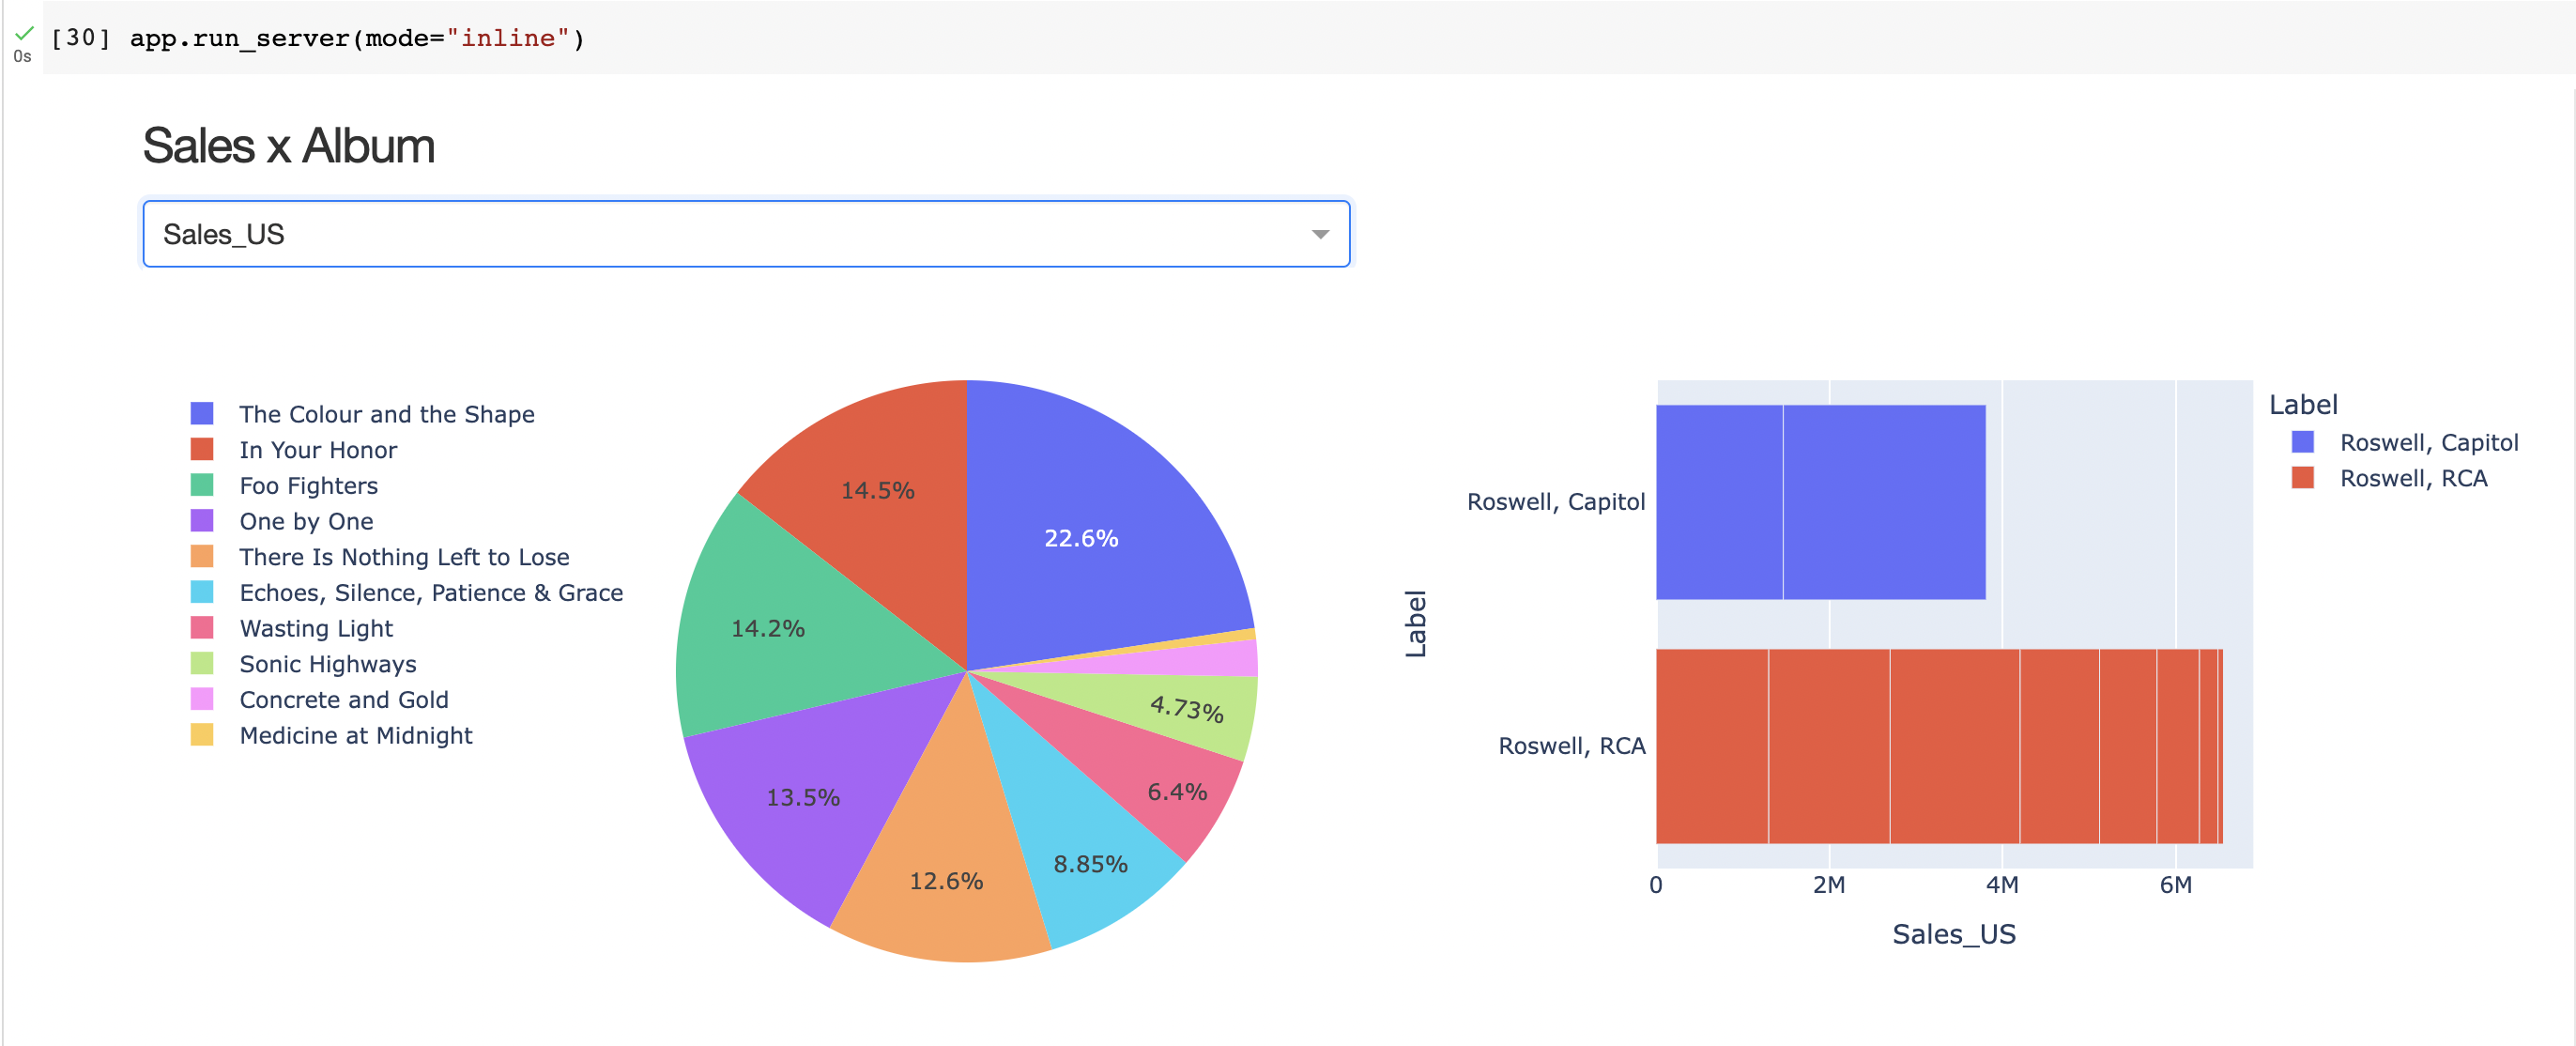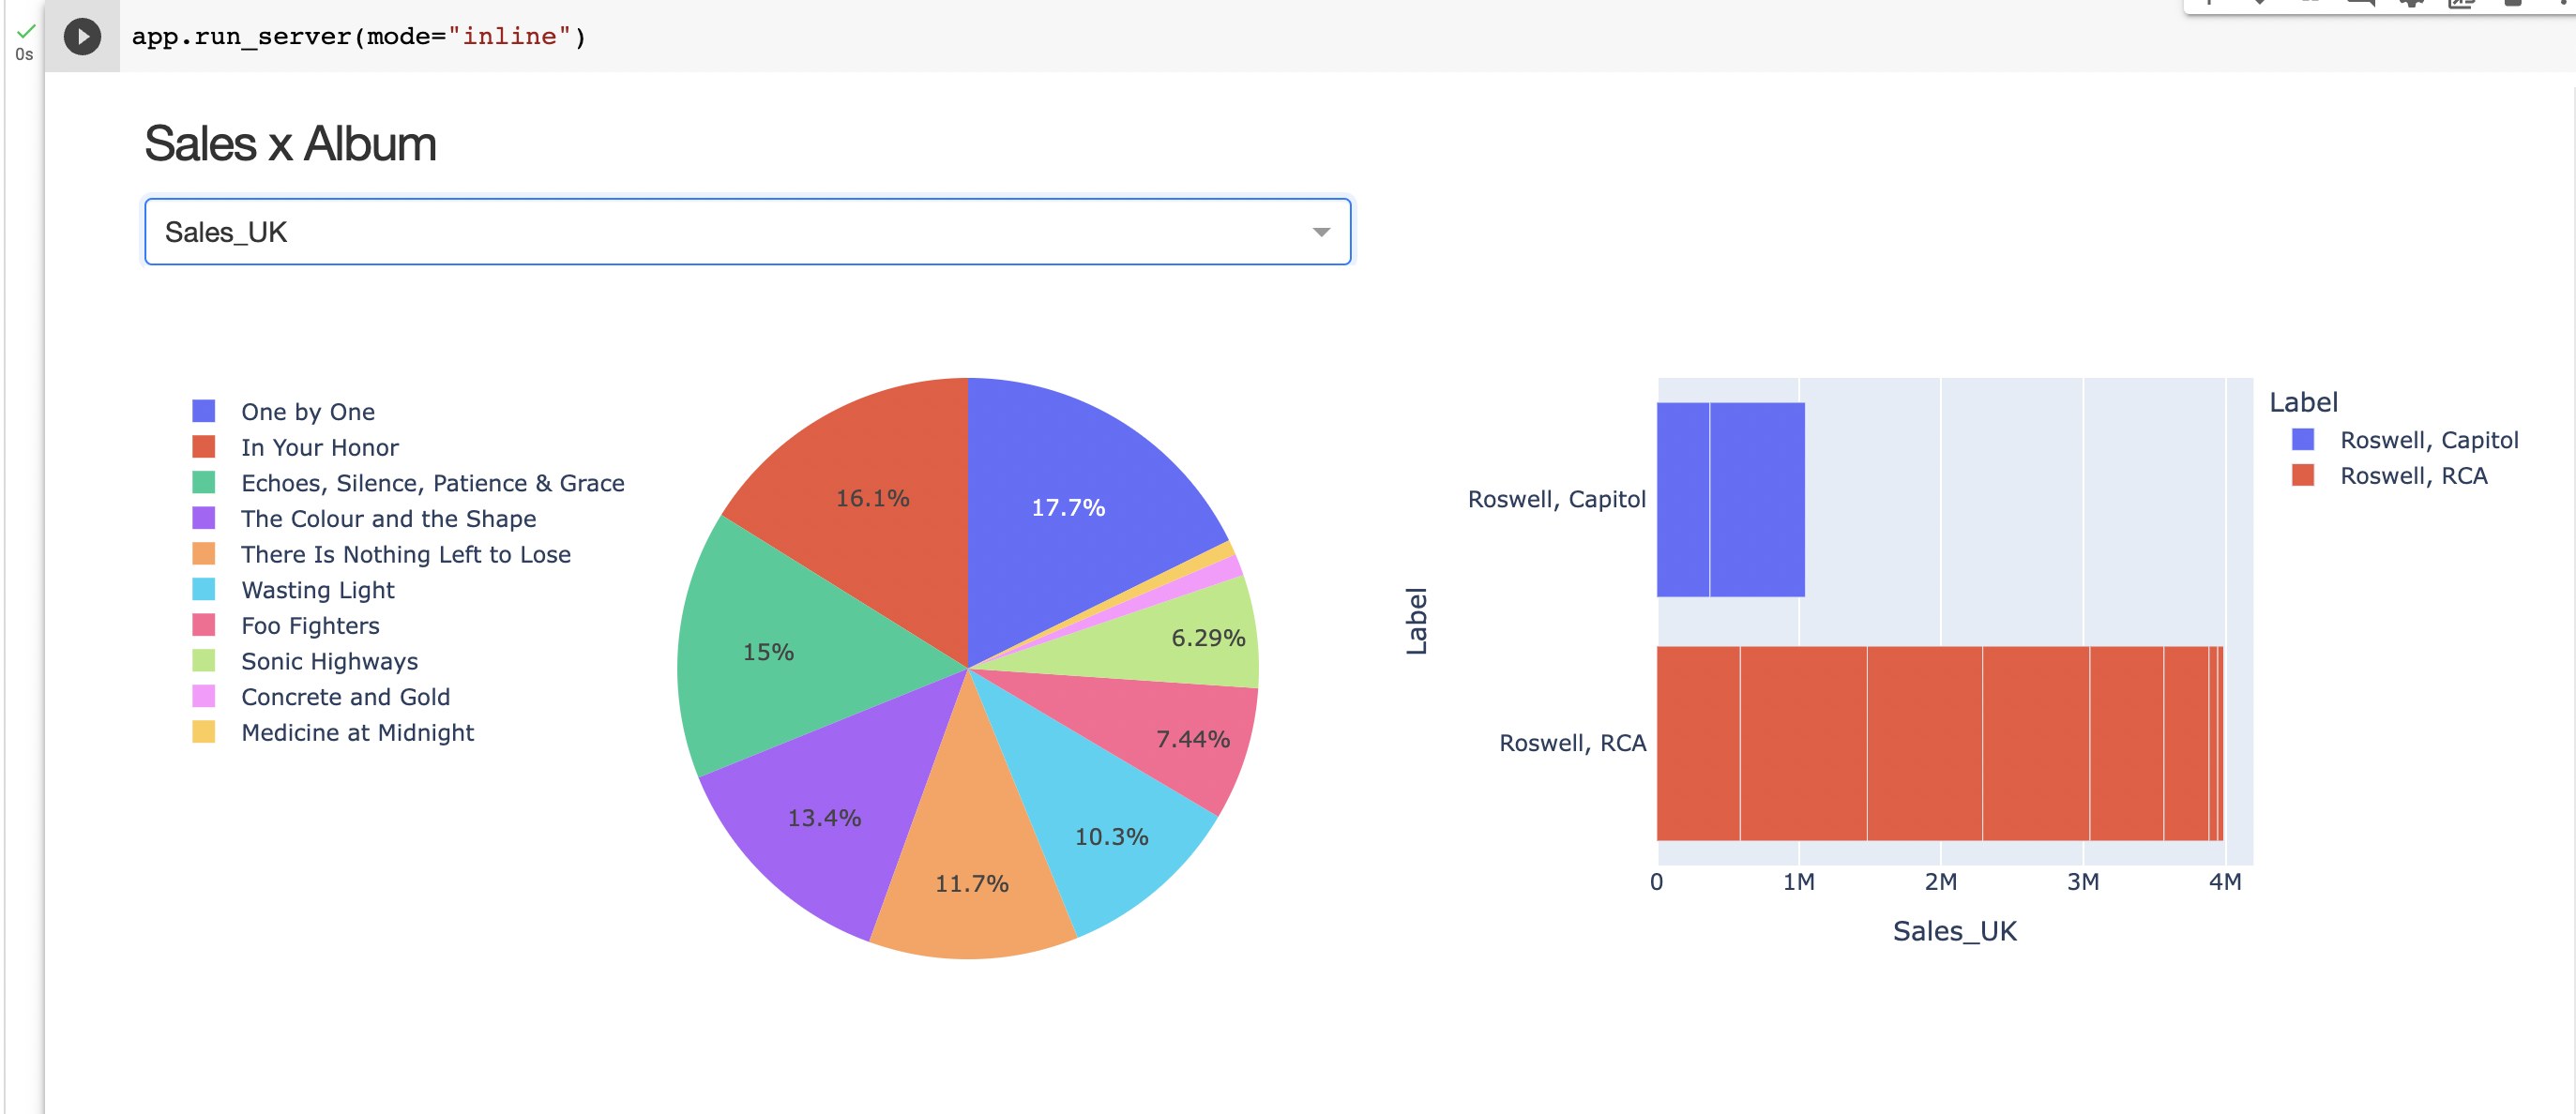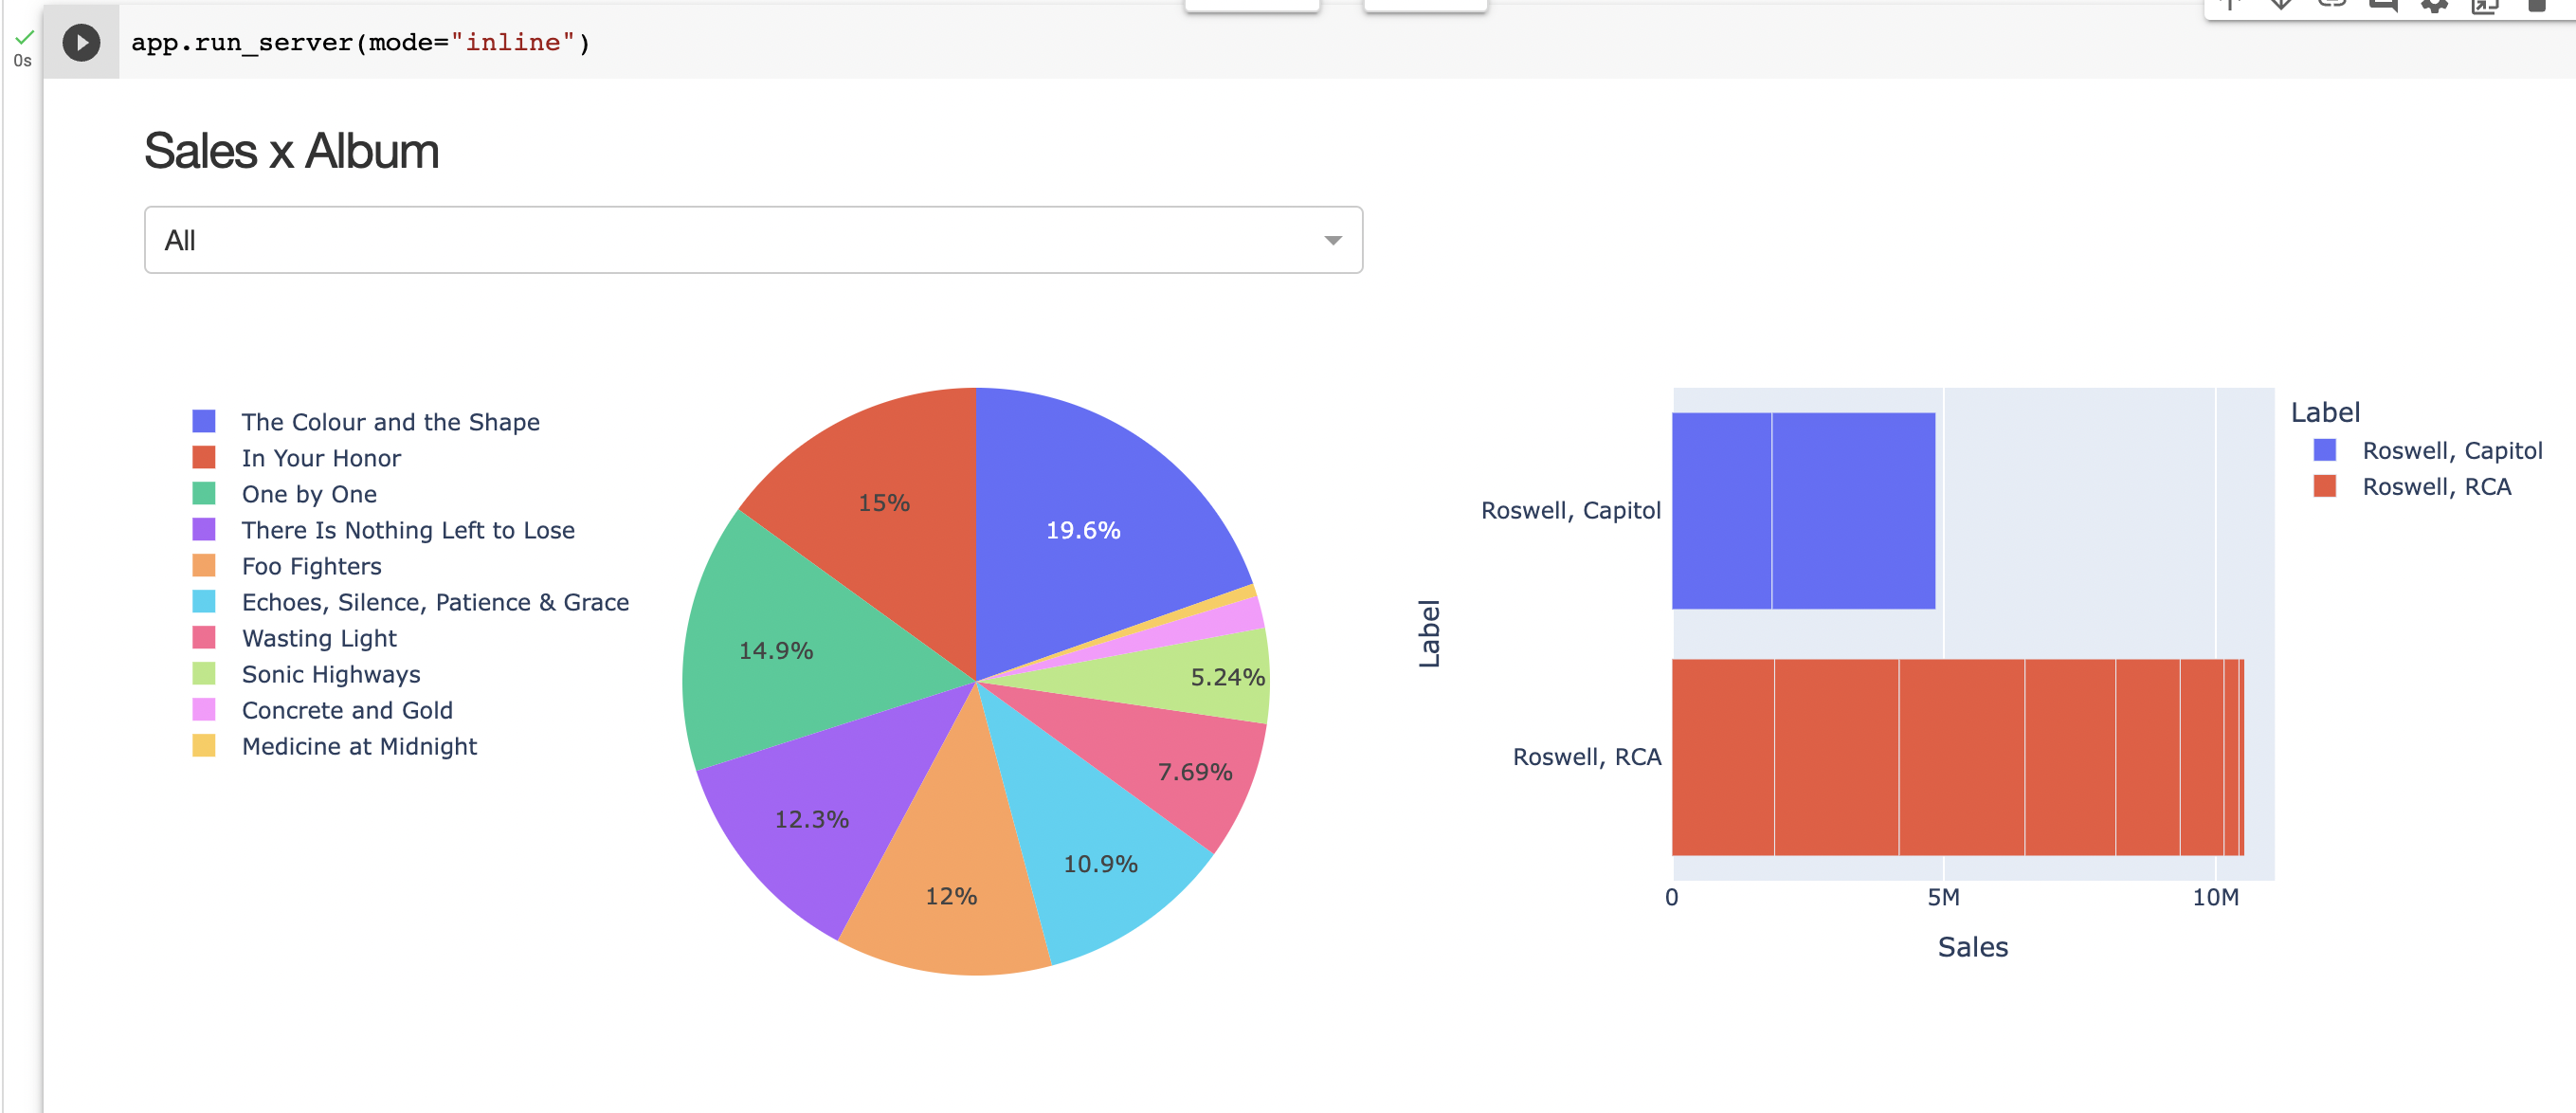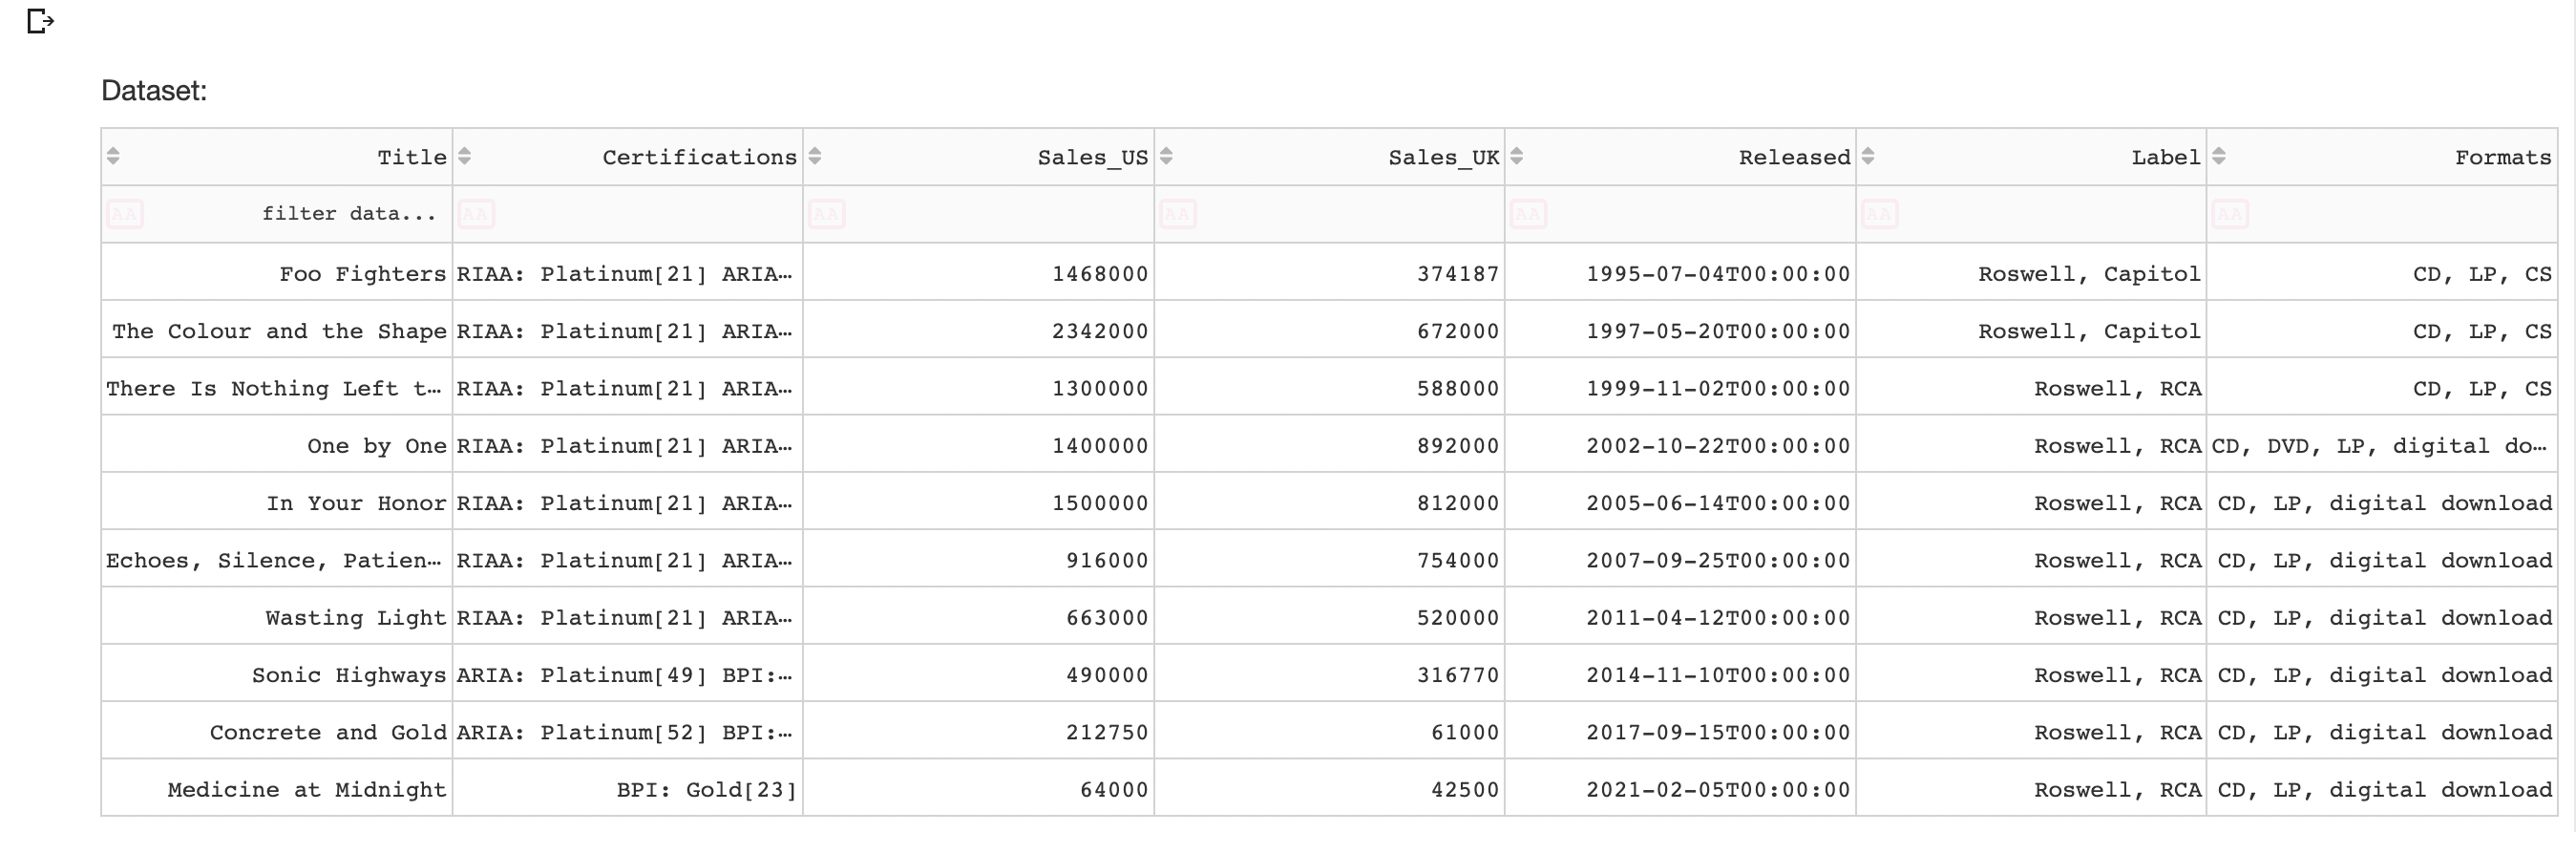

Interactive graphs with Bokeh

In [31]:
!pip install pandas-bokeh

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [32]:
import pandas_bokeh

In [33]:
from bokeh.core.enums import Orientation
from bokeh.models.annotations import Label

from bokeh.models import NumeralTickFormatter

In [34]:
pandas_bokeh.output_notebook() 

In [35]:
#color palette
colors=['#FDE724','#D01C8B','#4DAC26']
df_graph = df[["Title","Sales_US","Sales_UK","Label"]]

# Barplot
p_bar = df_graph.groupby(['Title']).mean().plot_bokeh(kind="barh", show_figure=False)
p_bar.xaxis[0].formatter = NumeralTickFormatter(format="$0")

# Stacked bar chart
df_sensor=df_graph.drop(['Title'],axis=1)
p_stack=df_sensor.groupby(['Label']).mean().plot_bokeh(kind='barh', stacked=True, show_figure=False)
p_stack.xaxis[0].formatter = NumeralTickFormatter(format="$0")



In [36]:
from bokeh.palettes import Category20c
from bokeh.plotting import figure, show
from bokeh.transform import cumsum

In [37]:
#Make Dashboard with Grid Layout: 
pandas_bokeh.plot_grid([[p_bar, p_stack]])


Column(id='1245', ...)

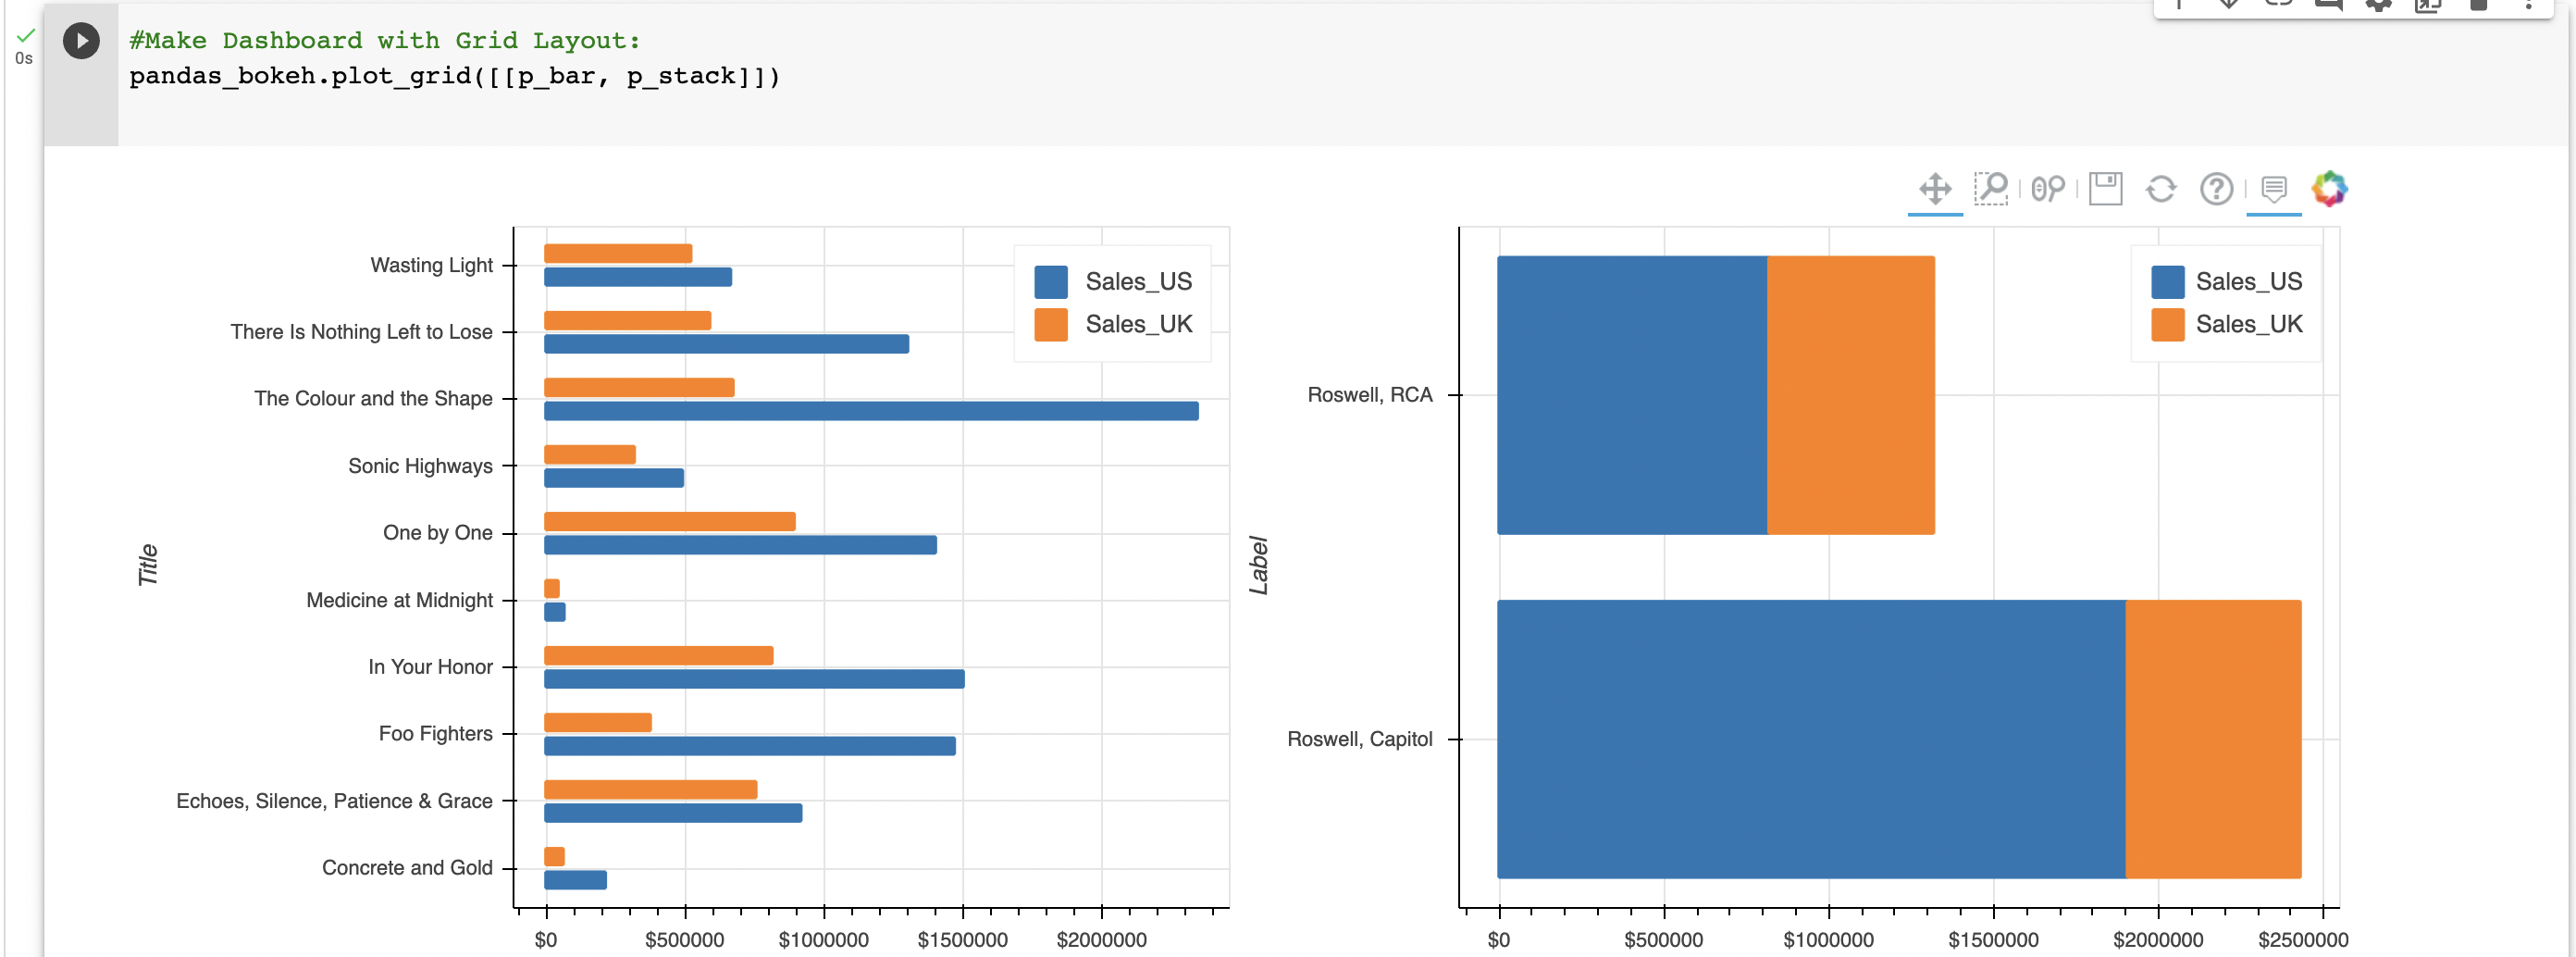